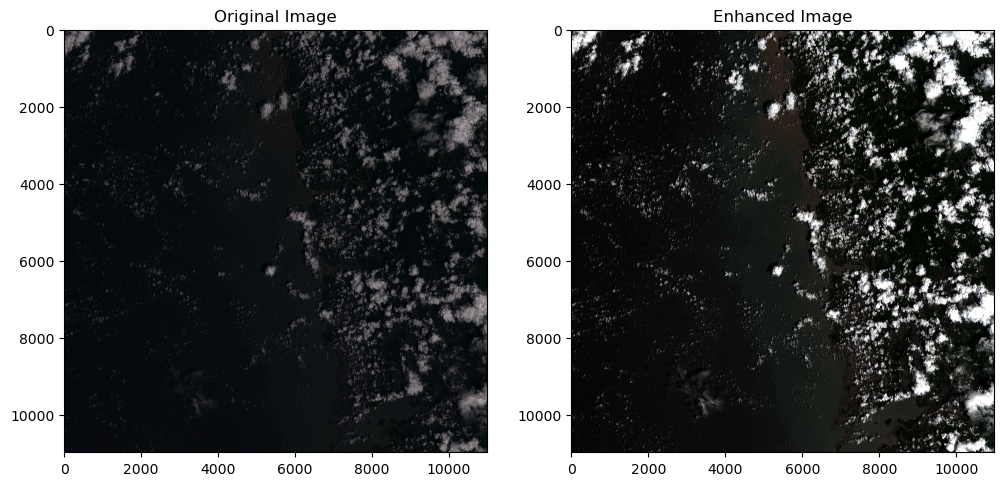

In [4]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from skimage import exposure

# Specify the paths to your .jp2 files (coarse data)
band2_path = "./Untitled Folder 1/T43QBB_20240908T053649_B02.jp2"  # Replace with your actual file path
band3_path = "./Untitled Folder 1/T43QBB_20240908T053649_B03.jp2"
band4_path = "./Untitled Folder 1/T43QBB_20240908T053649_B04.jp2"

# Step 1: Read each band using rasterio
with rio.open(band2_path) as band2:
    band2_data = band2.read(1)  # Read the first band

with rio.open(band3_path) as band3:
    band3_data = band3.read(1)

with rio.open(band4_path) as band4:
    band4_data = band4.read(1)

# Step 2: Stack the bands to create an RGB image
# Stack them in the order Red, Green, Blue (RGB)
rgb_image = np.dstack((band4_data, band3_data, band2_data))

# Step 3: Normalize the RGB image (if necessary)
# We normalize the data to range 0-1 for better visualization and enhancement
rgb_image_normalized = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Step 4: Enhance the image using contrast stretching
rgb_image_enhanced = np.zeros_like(rgb_image_normalized)
for i in range(rgb_image_normalized.shape[-1]):
    p2, p98 = np.percentile(rgb_image_normalized[:, :, i], (2, 98))
    rgb_image_enhanced[:, :, i] = exposure.rescale_intensity(rgb_image_normalized[:, :, i], in_range=(p2, p98))

# Step 5: Save the enhanced image
plt.imsave('coarse_data_rgb_enhanced.png', rgb_image_enhanced)

# Step 6: Plot the original and enhanced images side by side for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title("Original Image")
ax1.imshow(rgb_image_normalized)

ax2.set_title("Enhanced Image")
ax2.imshow(rgb_image_enhanced)

plt.show()


In [24]:
!pip install s2cloudless

In [27]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from skimage import exposure
from s2cloudless import S2Cloudless

# Specify the path to your enhanced .tif file (black and white image)
enhanced_image_path = 'coarse_data_rgb_enhanced.tif'  # Use your enhanced .tif file here

# Step 1: Read the enhanced image using rasterio
with rio.open(enhanced_image_path) as src:
    enhanced_image = src.read(1)  # Read the single band

# Step 2: Generate a cloud mask (assuming white clouds and dark background)
# Define a threshold for cloud detection
threshold = 0.3  # Adjust this value as necessary
cloud_mask = enhanced_image > threshold  # Cloud mask where pixel values are above the threshold

# Step 3: Save the cloud mask as a .tif file
cloud_mask_tif_path = 'cloud_mask.tif'
with rio.open(cloud_mask_tif_path, 'w', driver='GTiff',
               height=cloud_mask.shape[0],
               width=cloud_mask.shape[1],
               count=1, dtype='uint8',  # Use uint8 for binary mask
               crs=src.profile['crs'],
               transform=src.profile['transform']) as dst:
    dst.write(cloud_mask.astype('uint8'), 1)

# Step 4: Create an image without clouds
image_without_clouds = np.where(cloud_mask, 0, enhanced_image)  # Set cloud areas to 0 (black)

# Step 5: Create an image with clouds highlighted in yellow
highlighted_clouds = np.zeros((enhanced_image.shape[0], enhanced_image.shape[1], 3), dtype=float)
highlighted_clouds[:, :, 0] = enhanced_image  # Red channel
highlighted_clouds[:, :, 1] = enhanced_image  # Green channel
highlighted_clouds[:, :, 2] = enhanced_image  # Blue channel

# Highlight clouds in yellow where cloud_mask is True
highlighted_clouds[cloud_mask, 0] = 1  # Set red channel to 1 (255)
highlighted_clouds[cloud_mask, 1] = 1  # Set green channel to 1 (255)
highlighted_clouds[cloud_mask, 2] = 0  # Set blue channel to 0 (0)

# Step 6: Save the image without clouds
without_clouds_tif_path = 'image_without_clouds.tif'
with rio.open(without_clouds_tif_path, 'w', driver='GTiff',
               height=image_without_clouds.shape[0],
               width=image_without_clouds.shape[1],
               count=1, dtype='float32',  # Use float for enhanced image
               crs=src.profile['crs'],
               transform=src.profile['transform']) as dst:
    dst.write(image_without_clouds, 1)

# Step 7: Save the highlighted clouds image
highlighted_clouds_path = 'highlighted_clouds_image.tif'
with rio.open(highlighted_clouds_path, 'w', driver='GTiff',
               height=highlighted_clouds.shape[0],
               width=highlighted_clouds.shape[1],
               count=3, dtype='float32',
               crs=src.profile['crs'],
               transform=src.profile['transform']) as dst:
    dst.write((highlighted_clouds * 255).astype('uint8')[:, :, 0], 1)  # Red channel
    dst.write((highlighted_clouds * 255).astype('uint8')[:, :, 1], 2)  # Green channel
    dst.write((highlighted_clouds * 255).astype('uint8')[:, :, 2], 3)  # Blue channel

# Step 8: Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.set_title("Enhanced Image")
ax1.imshow(enhanced_image, cmap='gray')

ax2.set_title("Image Without Clouds")
ax2.imshow(image_without_clouds, cmap='gray')

ax3.set_title("Highlighted Clouds Image")
ax3.imshow(highlighted_clouds)

plt.show()


ImportError: cannot import name 'S2Cloudless' from 's2cloudless' (C:\Users\prava\anaconda3\Lib\site-packages\s2cloudless\__init__.py)

In [28]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Specify the path to your enhanced .tif file (black and white image)
enhanced_image_path = 'coarse_data_rgb_enhanced.tif'  # Use your enhanced .tif file here

# Step 1: Read the enhanced image using rasterio
with rio.open(enhanced_image_path) as src:
    enhanced_image = src.read(1)  # Read the single band

# Step 2: Generate a cloud mask (assuming white clouds and dark background)
# Define a threshold for cloud detection
threshold = 0.3  # Adjust this value as necessary
cloud_mask = enhanced_image > threshold  # Cloud mask where pixel values are above the threshold

# Step 3: Save the cloud mask as a .tif file
cloud_mask_tif_path = 'cloud_mask.tif'
with rio.open(cloud_mask_tif_path, 'w', driver='GTiff',
               height=cloud_mask.shape[0],
               width=cloud_mask.shape[1],
               count=1, dtype='uint8',  # Use uint8 for binary mask
               crs=src.profile['crs'],
               transform=src.profile['transform']) as dst:
    dst.write(cloud_mask.astype('uint8'), 1)

# Step 4: Create an image without clouds
image_without_clouds = np.where(cloud_mask, 0, enhanced_image)  # Set cloud areas to 0 (black)

# Step 5: Create an image with clouds highlighted in yellow
highlighted_clouds = np.zeros((enhanced_image.shape[0], enhanced_image.shape[1], 3), dtype=float)
highlighted_clouds[:, :, 0] = enhanced_image  # Red channel
highlighted_clouds[:, :, 1] = enhanced_image  # Green channel
highlighted_clouds[:, :, 2] = enhanced_image  # Blue channel

# Highlight clouds in yellow where cloud_mask is True
highlighted_clouds[cloud_mask, 0] = 1  # Set red channel to 1 (255)
highlighted_clouds[cloud_mask, 1] = 1  # Set green channel to 1 (255)
highlighted_clouds[cloud_mask, 2] = 0  # Set blue channel to 0 (0)

# Step 6: Save the image without clouds
without_clouds_tif_path = 'image_without_clouds.tif'
with rio.open(without_clouds_tif_path, 'w', driver='GTiff',
               height=image_without_clouds.shape[0],
               width=image_without_clouds.shape[1],
               count=1, dtype='float32',  # Use float for enhanced image
               crs=src.profile['crs'],
               transform=src.profile['transform']) as dst:
    dst.write(image_without_clouds, 1)

# Step 7: Save the highlighted clouds image
highlighted_clouds_path = 'highlighted_clouds_image.tif'
with rio.open(highlighted_clouds_path, 'w', driver='GTiff',
               height=highlighted_clouds.shape[0],
               width=highlighted_clouds.shape[1],
               count=3, dtype='float32',
               crs=src.profile['crs'],
               transform=src.profile['transform']) as dst:
    dst.write((highlighted_clouds * 255).astype('uint8')[:, :, 0], 1)  # Red channel
    dst.write((highlighted_clouds * 255).astype('uint8')[:, :, 1], 2)  # Green channel
    dst.write((highlighted_clouds * 255).astype('uint8')[:, :, 2], 3)  # Blue channel

# Step 8: Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.set_title("Enhanced Image")
ax1.imshow(enhanced_image, cmap='gray')

ax2.set_title("Image Without Clouds")
ax2.imshow(image_without_clouds, cmap='gray')

ax3.set_title("Highlighted Clouds Image")
ax3.imshow(highlighted_clouds)

plt.show()


RasterioIOError: Dataset is closed: coarse_data_rgb_enhanced.tif

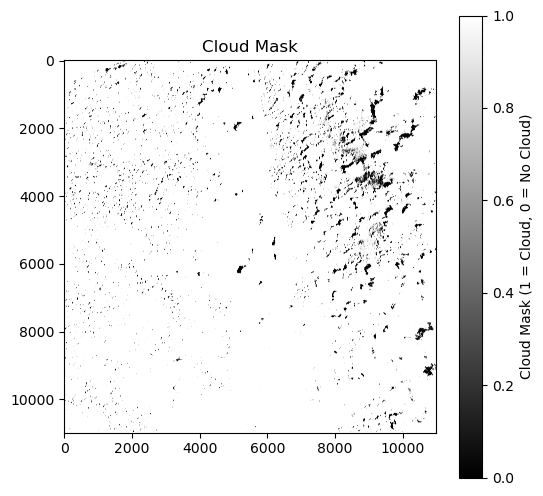

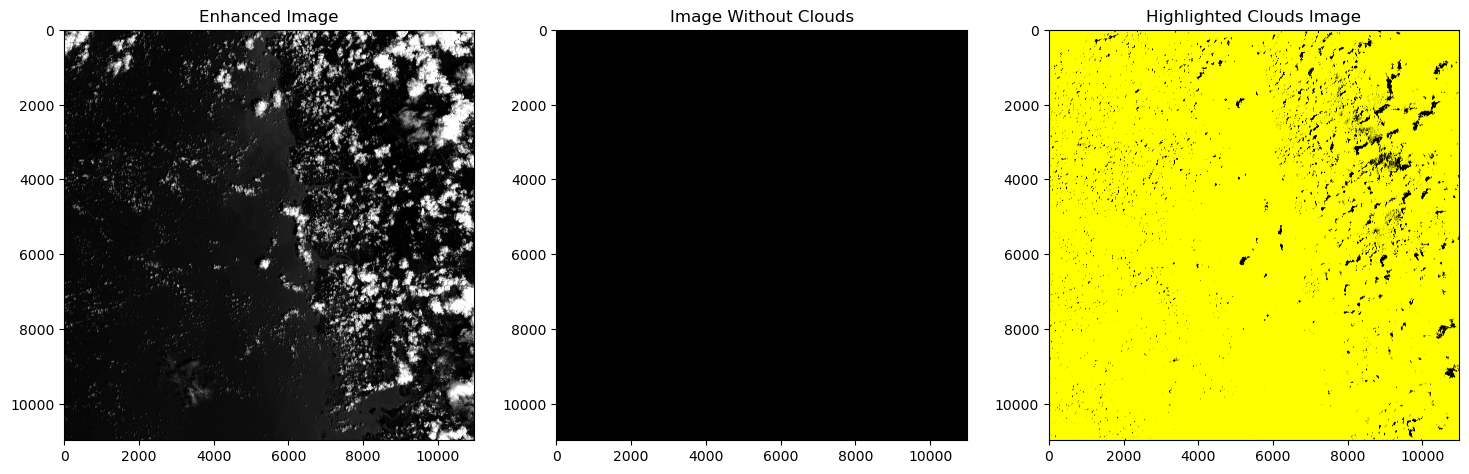

In [30]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Specify the path to your enhanced .tif file (black and white image)
enhanced_image_path = 'coarse_data_rgb_enhanced.tif'  # Use your enhanced .tif file here

# Step 1: Read the enhanced image using rasterio
with rio.open(enhanced_image_path) as src:
    enhanced_image = src.read(1)  # Read the single band
    # Store CRS and transform before closing the dataset
    crs = src.profile['crs']
    transform = src.profile['transform']

# Step 2: Generate a cloud mask (assuming white clouds and dark background)
# Define a threshold for cloud detection
threshold = 0.3  # Adjust this value as necessary
cloud_mask = enhanced_image > threshold  # Cloud mask where pixel values are above the threshold

# Visualize the cloud mask
plt.figure(figsize=(6, 6))
plt.title("Cloud Mask")
plt.imshow(cloud_mask, cmap='gray')
plt.colorbar(label='Cloud Mask (1 = Cloud, 0 = No Cloud)')
plt.show()

# Step 3: Save the cloud mask as a .tif file
cloud_mask_tif_path = 'cloud_mask.tif'
with rio.open(cloud_mask_tif_path, 'w', driver='GTiff',
               height=cloud_mask.shape[0],
               width=cloud_mask.shape[1],
               count=1, dtype='uint8',  # Use uint8 for binary mask
               crs=crs,
               transform=transform) as dst:
    dst.write(cloud_mask.astype('uint8'), 1)

# Step 4: Create an image without clouds
image_without_clouds = np.where(cloud_mask, 0, enhanced_image)  # Set cloud areas to 0 (black)

# Step 5: Create an image with clouds highlighted in yellow
highlighted_clouds = np.zeros((enhanced_image.shape[0], enhanced_image.shape[1], 3), dtype=float)
highlighted_clouds[:, :, 0] = enhanced_image  # Red channel
highlighted_clouds[:, :, 1] = enhanced_image  # Green channel
highlighted_clouds[:, :, 2] = enhanced_image  # Blue channel

# Highlight clouds in yellow where cloud_mask is True
highlighted_clouds[cloud_mask, 0] = 1  # Set red channel to 1 (255)
highlighted_clouds[cloud_mask, 1] = 1  # Set green channel to 1 (255)
highlighted_clouds[cloud_mask, 2] = 0  # Set blue channel to 0 (0)

# Step 6: Save the image without clouds
without_clouds_tif_path = 'image_without_clouds.tif'
with rio.open(without_clouds_tif_path, 'w', driver='GTiff',
               height=image_without_clouds.shape[0],
               width=image_without_clouds.shape[1],
               count=1, dtype='float32',  # Use float for enhanced image
               crs=crs,
               transform=transform) as dst:
    dst.write(image_without_clouds, 1)

# Step 7: Save the highlighted clouds image
highlighted_clouds_path = 'highlighted_clouds_image.tif'
with rio.open(highlighted_clouds_path, 'w', driver='GTiff',
               height=highlighted_clouds.shape[0],
               width=highlighted_clouds.shape[1],
               count=3, dtype='float32',
               crs=crs,
               transform=transform) as dst:
    dst.write((highlighted_clouds * 255).astype('uint8')[:, :, 0], 1)  # Red channel
    dst.write((highlighted_clouds * 255).astype('uint8')[:, :, 1], 2)  # Green channel
    dst.write((highlighted_clouds * 255).astype('uint8')[:, :, 2], 3)  # Blue channel

# Step 8: Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.set_title("Enhanced Image")
ax1.imshow(enhanced_image, cmap='gray')

ax2.set_title("Image Without Clouds")
ax2.imshow(image_without_clouds, cmap='gray')

ax3.set_title("Highlighted Clouds Image")
ax3.imshow(highlighted_clouds)

plt.show()



Loaded mask shape: (10980, 10980)


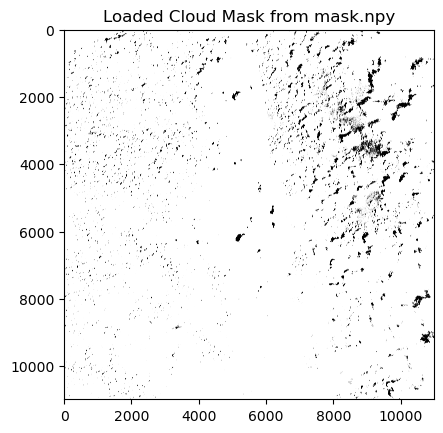

In [33]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Specify the path to your enhanced .tif file (black and white image)
enhanced_image_path = './coarse_data_rgb_enhanced.tif'  # Use your enhanced .tif file here

# Step 1: Read the enhanced image using rasterio
with rio.open(enhanced_image_path) as src:
    enhanced_image = src.read(1)  # Read the single band
    # Store CRS and transform before closing the dataset
    crs = src.profile['crs']
    transform = src.profile['transform']

# Step 2: Generate a cloud mask
threshold = 0.3  # Adjust this value as necessary
cloud_mask = enhanced_image > threshold  # Cloud mask where pixel values are above the threshold

# Step 3: Save the cloud mask as a .npy file
mask_npy_path = 'mask.npy'
np.save(mask_npy_path, cloud_mask.astype(np.uint8))  # Save the mask as a binary numpy array

# To verify, you can load the mask back and check its shape or any property
loaded_mask = np.load(mask_npy_path)
print("Loaded mask shape:", loaded_mask.shape)

# Optionally, visualize the saved mask
plt.imshow(loaded_mask, cmap='gray')
plt.title("Loaded Cloud Mask from mask.npy")
plt.show()


In [32]:
!pip install -q rasterio pytorch-lightning==1.8.1
     

DEPRECATION: pytorch-lightning 1.8.1 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.


In [35]:

import sys
sys.path.append('./satellite-cloud-removal-dip/')


import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (20, 10)

In [40]:
import rasterio as rio
import numpy as np
from skimage.metrics import structural_similarity as ssim

def rgb(image):
    if image.shape[-1] > 12:
        return image[...,(3,2,1)]
    elif image.shape[-1] == 3:        
        return image
    # S1 -> VV, VH
    elif image.shape[-1] == 2:
        return np.concatenate((np.zeros((*image.shape[:-1],1)), image), axis = -1)
    
import rasterio as rio
import numpy as np
from skimage.metrics import structural_similarity as ssim

def s2_preprocess(path, val_range=[0, 1e4], scale=2e3, channels=[2, 1, 0]):  # Update channels for RGB
    with rio.open(path) as s2_file:
        all_channels = s2_file.read()  # Read all bands
        # Make sure the channels you want to extract are within the available bands
        valid_channels = [ch for ch in channels if ch < all_channels.shape[0]]
        s2 = all_channels[valid_channels, :, :]

        s2clip = s2.clip(*val_range)
        s2clip /= scale

        return s2clip.transpose(1, 2, 0)  # Transpose to height, width, channels

# Call the s2_preprocess function
s2_image = s2_preprocess('./coarse_data_rgb_enhanced.tif')

# Load the mask
with open('./mask.npy', 'rb') as f:
    mask = np.load(f)

# Further processing or visualization...


def s1_preprocess(path, max_val = 2.0, to_db = False):
    s1_file= rio.open(path)
    s1vv, s1vh, s1m = s1_file.read() # s1m is the mean
    
    s1_stack = np.stack([s1vv, s1vh], axis = -1)
    
    # 1. Apply dB scale
    if to_db:
        s1dB = 10*np.log10(s1_stack)
    else:
        s1dB = s1_stack

    # 2. Clip
    # "The clipping range for the Sentinel-1 VV and VH is [−25,0] and [−32.5,0]"
    # 3. Contain within [0, max_val]
    s1dB[...,0] = max_val*(s1dB[...,0].clip(-25, 0) + 25) / 25
    s1dB[...,1] = max_val*(s1dB[...,1].clip(-32.5, 0) + 32.5) / 32.5  

    return s1dB

def masked_ssim(im1, im2):
    # SSIM masking added for reference
    
    ssim_val, ssim_img = ssim(im1, im2, multichannel = True, full = True)
    return ssim_img[mask == mask.min()].mean()
    

In [41]:
s2_image = s2_preprocess('./coarse_data_rgb_enhanced.tif')

with open('./mask.npy', 'rb') as f:
    mask = np.load(f)

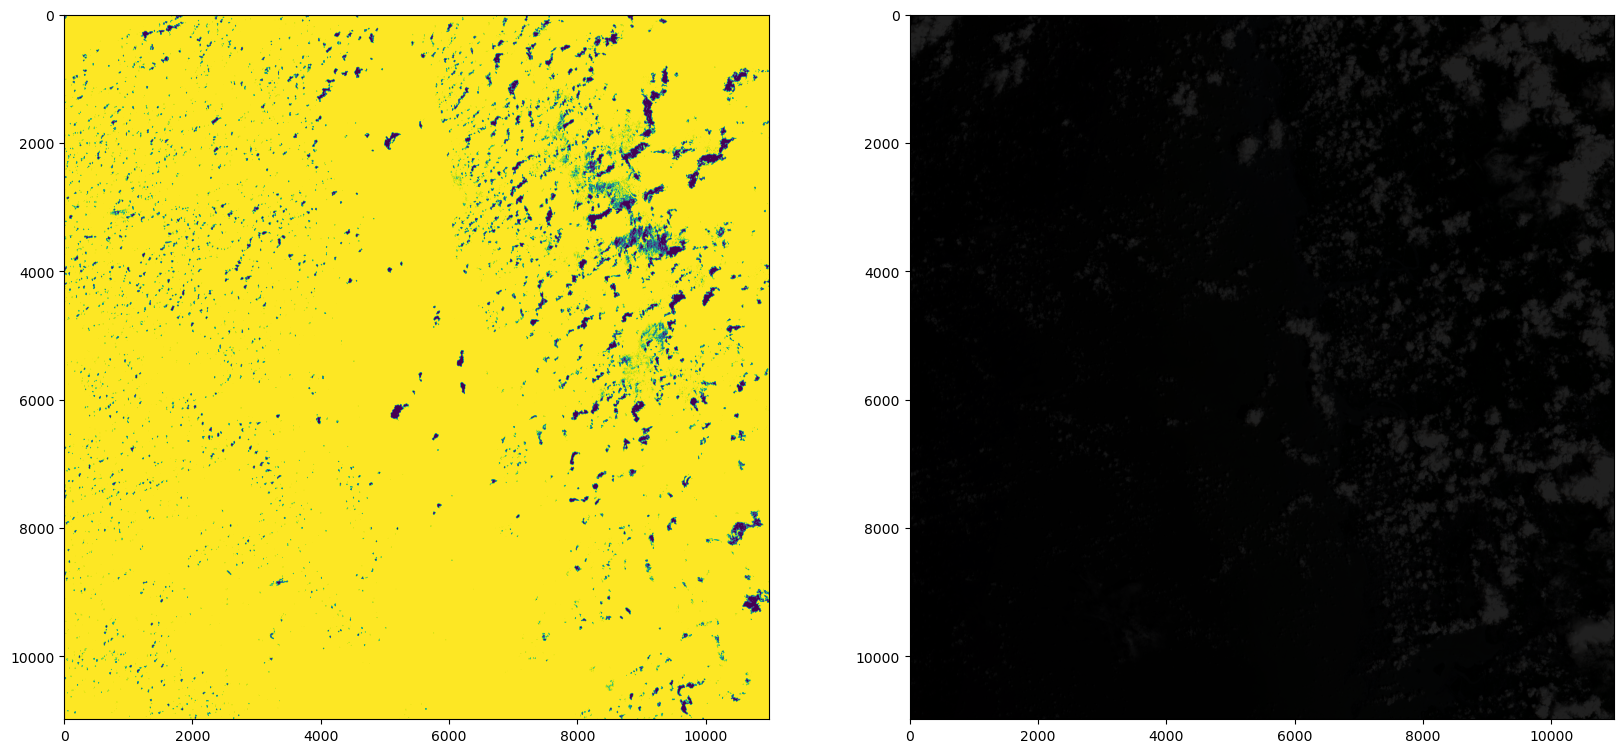

In [42]:
plt.subplot(1,2,1)
plt.imshow(mask)
plt.subplot(1,2,2)
plt.imshow(s2_image)

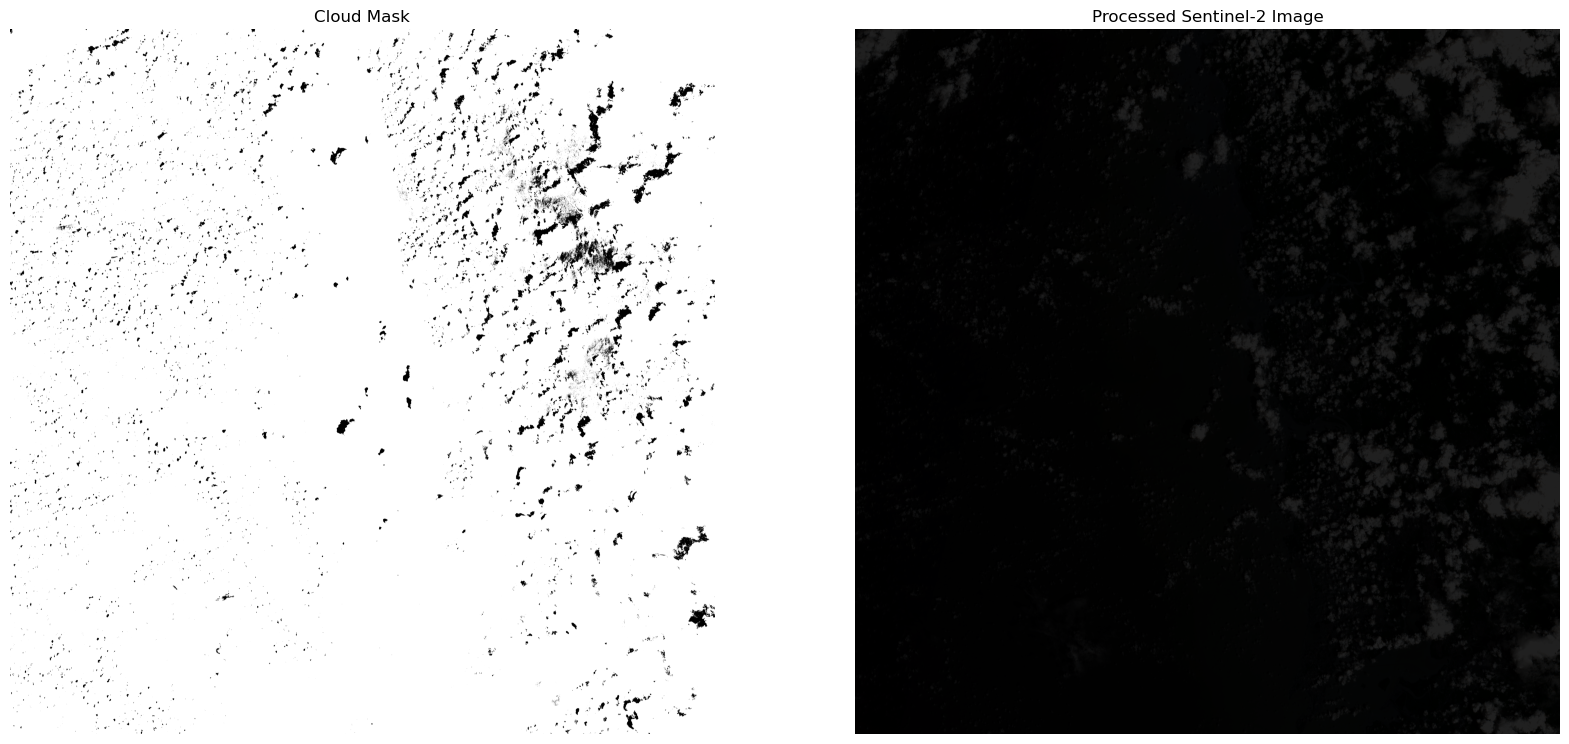

C:\Users\prava\anaconda3\Lib\site-packages\rasterio\__init__.py:378: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


In [43]:
import matplotlib.pyplot as plt

# Plot the mask and s2_image side by side
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')  # Use a colormap for the mask if needed
plt.title('Cloud Mask')
plt.axis('off')  # Optional: turn off axis

plt.subplot(1, 2, 2)
plt.imshow(s2_image)  # Assuming s2_image is in RGB format
plt.title('Processed Sentinel-2 Image')
plt.axis('off')  # Optional: turn off axis

# Show the plot
plt.show()

# Save the s2_image as a .tif file
output_image_path = 'processed_s2_image.tif'  # Change to your desired output path
with rio.open(output_image_path, 'w', driver='GTiff', 
               height=s2_image.shape[0], width=s2_image.shape[1], 
               count=s2_image.shape[2], dtype='float32') as dst:
    dst.write(s2_image.transpose(2, 0, 1))  # Transpose to (bands, height, width)


In [44]:
import rasterio as rio
import numpy as np
from skimage import exposure

# Step 1: Load the previously saved processed image
input_image_path = 'processed_s2_image.tif'  # Path to your previously saved image
with rio.open(input_image_path) as src:
    s2_image = src.read()  # Read the image bands
    profile = src.profile  # Store the profile for saving later

# Step 2: Enhance the image

# Function to enhance the image using contrast stretching and brightness adjustment
def enhance_image(image, brightness_factor=1.2, clip_limit=0.03):
    # Adjust brightness
    enhanced_image = image * brightness_factor
    
    # Clip values to be between 0 and 1
    enhanced_image = np.clip(enhanced_image, 0, 1)
    
    # Contrast stretching using histogram equalization
    for i in range(image.shape[0]):  # For each band
        p2, p98 = np.percentile(enhanced_image[i], (2, 98))  # 2% and 98% percentiles
        enhanced_image[i] = exposure.rescale_intensity(enhanced_image[i], in_range=(p2, p98))
    
    return enhanced_image

# Enhance the image
enhanced_s2_image = enhance_image(s2_image.astype('float32'))

# Step 3: Save the enhanced image
enhanced_output_image_path = 'enhanced_s2_image.tif'  # Specify your output path
with rio.open(enhanced_output_image_path, 'w', driver='GTiff',
               height=enhanced_s2_image.shape[1],
               width=enhanced_s2_image.shape[2],
               count=enhanced_s2_image.shape[0],
               dtype='float32',  # Use float32 to retain precision
               crs=profile['crs'],
               transform=profile['transform']) as dst:
    dst.write(enhanced_s2_image)  # Write the enhanced image

print("Enhanced image saved as:", enhanced_output_image_path)


C:\Users\prava\anaconda3\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\prava\anaconda3\Lib\site-packages\rasterio\__init__.py:378: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


Enhanced image saved as: enhanced_s2_image.tif


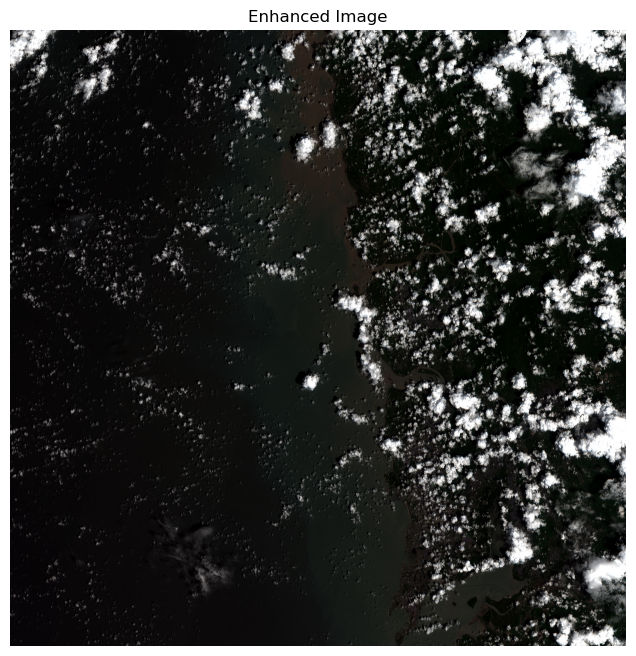

In [45]:
import rasterio as rio
import matplotlib.pyplot as plt

# Step 1: Load the enhanced image
enhanced_output_image_path = 'enhanced_s2_image.tif'  # Path to your enhanced image
with rio.open(enhanced_output_image_path) as src:
    enhanced_image = src.read()  # Read the image bands

# Step 2: Plot the enhanced image
# Assuming it's a multi-band image, we can display the first three bands (R, G, B)
if enhanced_image.shape[0] >= 3:  # Check if there are at least 3 bands
    rgb_image = np.dstack((enhanced_image[2], enhanced_image[1], enhanced_image[0]))  # BGR to RGB
else:
    rgb_image = enhanced_image[0]  # For single-band images, just display the first band

# Normalize the RGB image for better visualization
rgb_image_normalized = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Step 3: Display the image
plt.figure(figsize=(10, 8))
plt.imshow(rgb_image_normalized)
plt.title('Enhanced Image')
plt.axis('off')  # Turn off axis
plt.show()


In [46]:
import numpy as np
import rasterio as rio
from s2cloudless import S2Cloudless
from scipy.ndimage import interpolation

# Load coarse or fine enhanced image
with rio.open('coarse_data_rgb_enhanced.tif') as src:
    image = src.read([1, 2, 3])  # Assuming a 3-channel image (R, G, B)
    profile = src.profile

# Instantiate cloud detector
cloud_detector = S2Cloudless()
cloud_probs = cloud_detector.get_cloud_probability_maps(image)

# Generate binary mask (e.g., threshold at 50% probability)
cloud_mask = cloud_probs > 0.5

# Apply cloud mask and perform inpainting for cloud removal
cloud_free_image = np.where(cloud_mask, np.nan, image)  # Set clouded areas to NaN
inpainted_image = interpolation.map_coordinates(cloud_free_image, [0], mode='nearest')  # Inpaint

# Save cloud-free inpainted image
with rio.open('cloud_free_image.tif', 'w', **profile) as dst:
    dst.write(inpainted_image)


ImportError: cannot import name 'S2Cloudless' from 's2cloudless' (C:\Users\prava\anaconda3\Lib\site-packages\s2cloudless\__init__.py)

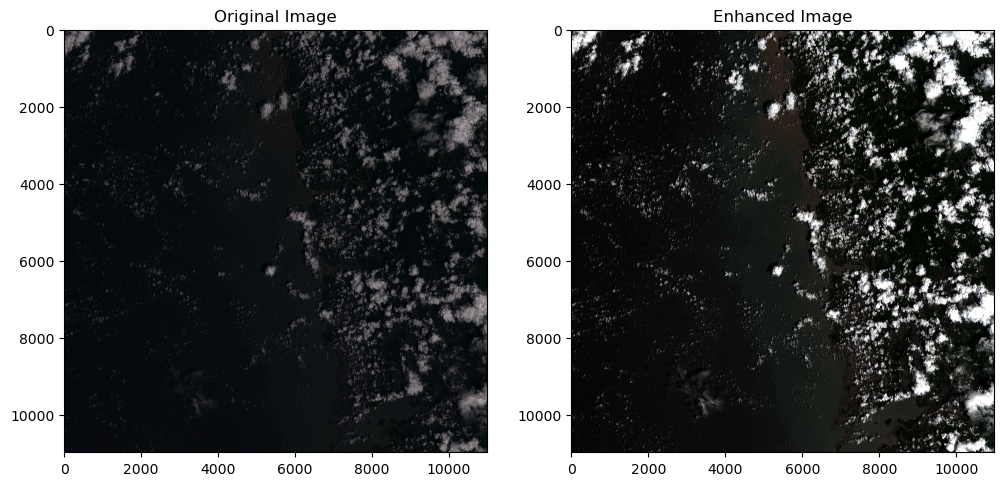

In [22]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from skimage import exposure

# Specify the paths to your .jp2 files (coarse data)
band2_path = "./Untitled Folder 1/T43QBB_20240908T053649_B02.jp2"  # Replace with your actual file path
band3_path = "./Untitled Folder 1/T43QBB_20240908T053649_B03.jp2"
band4_path = "./Untitled Folder 1/T43QBB_20240908T053649_B04.jp2"

# Step 1: Read each band using rasterio
with rio.open(band2_path) as band2:
    band2_data = band2.read(1)  # Read the first band
    profile = band2.profile  # Get metadata for the bands

with rio.open(band3_path) as band3:
    band3_data = band3.read(1)

with rio.open(band4_path) as band4:
    band4_data = band4.read(1)

# Step 2: Stack the bands to create an RGB image
# Stack them in the order Red, Green, Blue (RGB)
rgb_image = np.dstack((band4_data, band3_data, band2_data))

# Step 3: Normalize the RGB image (if necessary)
# We normalize the data to range 0-1 for better visualization and enhancement
rgb_image_normalized = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Step 4: Enhance the image using contrast stretching
rgb_image_enhanced = np.zeros_like(rgb_image_normalized)
for i in range(rgb_image_normalized.shape[-1]):
    p2, p98 = np.percentile(rgb_image_normalized[:, :, i], (2, 98))
    rgb_image_enhanced[:, :, i] = exposure.rescale_intensity(rgb_image_normalized[:, :, i], in_range=(p2, p98))

# Step 5: Save the enhanced image as a .tif file
enhanced_tif_path = 'coarse_data_rgb_enhanced.tif'
with rio.open(enhanced_tif_path, 'w', driver='GTiff',
               height=rgb_image_enhanced.shape[0],
               width=rgb_image_enhanced.shape[1],
               count=3, dtype='float32',  # or 'uint16' depending on your data range
               crs=profile['crs'],
               transform=profile['transform']) as dst:
    dst.write((rgb_image_enhanced * 255).astype('uint8')[:, :, 0], 1)  # Red channel
    dst.write((rgb_image_enhanced * 255).astype('uint8')[:, :, 1], 2)  # Green channel
    dst.write((rgb_image_enhanced * 255).astype('uint8')[:, :, 2], 3)  # Blue channel

# Step 6: Plot the original and enhanced images side by side for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title("Original Image")
ax1.imshow(rgb_image_normalized)

ax2.set_title("Enhanced Image")
ax2.imshow(rgb_image_enhanced)

plt.show()


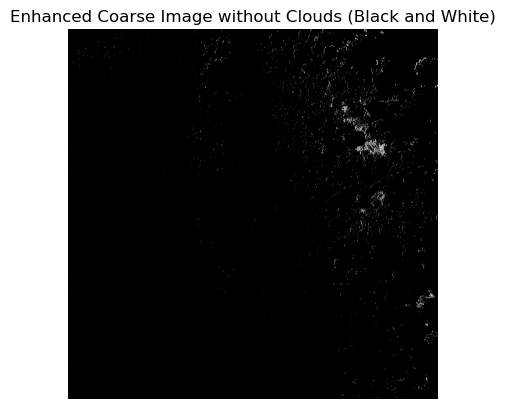

In [4]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from skimage import exposure

# Path to the enhanced image without clouds
enhanced_image_path = './enhanced_coarse_image_no_clouds_simple.tif'  # Replace with the path to your cloud-free image

# Load the enhanced image without clouds
with rasterio.open(enhanced_image_path) as src:
    img = src.read()  # Read all bands (assumes RGB or grayscale)
    profile = src.profile  # Get metadata for saving later

# Convert to grayscale by averaging the bands
# If the image already has only one band, this step is not needed
if img.shape[0] > 1:
    grayscale_img = np.mean(img, axis=0)
else:
    grayscale_img = img[0]

# Apply histogram equalization to enhance contrast
enhanced_grayscale_img = exposure.equalize_hist(grayscale_img)

# Save the enhanced grayscale image
output_bw_path = './enhanced_coarse_image_no_clouds_bw.tif'
# Update profile for a single-band grayscale output
profile.update(dtype=rasterio.float32, count=1)
with rasterio.open(output_bw_path, 'w', **profile) as dst:
    dst.write(enhanced_grayscale_img.astype(rasterio.float32), 1)

# Display the enhanced grayscale image
plt.imshow(enhanced_grayscale_img, cmap='gray')
plt.title("Enhanced Coarse Image without Clouds (Black and White)")
plt.axis("off")
plt.show()


In [47]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from skimage import exposure

# Path to the enhanced image without clouds
enhanced_image_path = './enhanced_coarse_image_no_clouds_simple.tif'  # Replace with the path to your cloud-free image

# Load the enhanced image without clouds
with rasterio.open(enhanced_image_path) as src:
    img = src.read()  # Read all bands (assumes RGB)
    profile = src.profile  # Get metadata for saving later

# Check if the image has multiple bands (RGB)
if img.shape[0] == 3:
    # Apply histogram equalization on each RGB channel individually
    enhanced_rgb_img = np.stack([exposure.equalize_hist(img[i, :, :]) for i in range(3)], axis=0)
else:
    raise ValueError("The image is not in RGB format. Expected 3 channels for RGB.")

# Save the enhanced RGB image
output_rgb_path = './enhanced_coarse_image_no_clouds_rgb.tif'
# Update profile for a 3-band RGB output
profile.update(dtype=rasterio.float32, count=3)
with rasterio.open(output_rgb_path, 'w', **profile) as dst:
    dst.write(enhanced_rgb_img.astype(rasterio.float32))

# Display the enhanced RGB image
plt.imshow(np.moveaxis(enhanced_rgb_img, 0, -1))
plt.title("Enhanced Coarse Image without Clouds (RGB)")
plt.axis("off")
plt.show()


MemoryError: Unable to allocate 3.59 GiB for an array with shape (10980, 10980, 4) and data type float64

<Figure size 2000x1000 with 1 Axes>

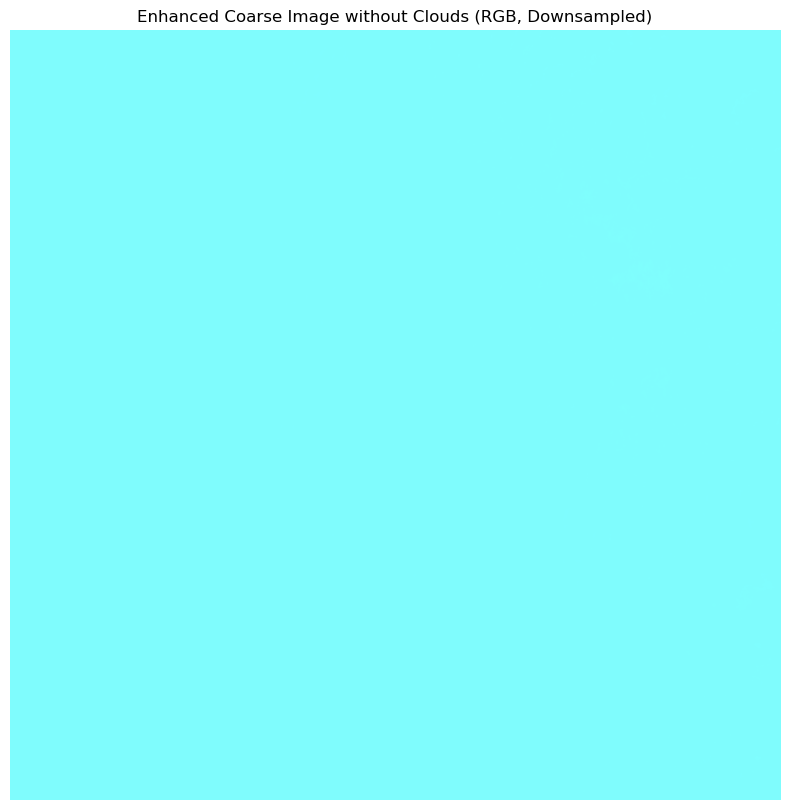

In [48]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.transform import resize

# Path to the enhanced image without clouds
enhanced_image_path = './enhanced_coarse_image_no_clouds_simple.tif'  # Replace with the path to your cloud-free image

# Load the enhanced image without clouds
with rasterio.open(enhanced_image_path) as src:
    img = src.read()  # Read all bands (assumes RGB)
    profile = src.profile  # Get metadata for saving later

# Check if the image has multiple bands (RGB)
if img.shape[0] == 3:
    # Apply histogram equalization on each RGB channel individually
    enhanced_rgb_img = np.stack([exposure.equalize_hist(img[i, :, :]) for i in range(3)], axis=0)
else:
    raise ValueError("The image is not in RGB format. Expected 3 channels for RGB.")

# Downsample the image for display (e.g., to 1024x1024 or a similar manageable size)
downsampled_rgb_img = np.stack([resize(enhanced_rgb_img[i], (1024, 1024), anti_aliasing=True) for i in range(3)], axis=0)

# Save the enhanced RGB image (full resolution)
output_rgb_path = './enhanced_coarse_image_no_clouds_rgb.tif'
profile.update(dtype=rasterio.float32, count=3)
with rasterio.open(output_rgb_path, 'w', **profile) as dst:
    dst.write(enhanced_rgb_img.astype(rasterio.float32))

# Display the downsampled RGB image
plt.imshow(np.moveaxis(downsampled_rgb_img, 0, -1))
plt.title("Enhanced Coarse Image without Clouds (RGB, Downsampled)")
plt.axis("off")
plt.show()


In [6]:
import rasterio

try:
    with rasterio.open('./enhanced_coarse_image_no_clouds_bw.tif') as src:
        print(src.meta)  # Display metadata
except rasterio.errors.RasterioIOError as e:
    print(f"Error reading the file: {e}")

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32643), 'transform': Affine(10.0, 0.0, 199980.0,
       0.0, -10.0, 2200020.0)}


In [12]:
conda install -c conda-forge gdal


Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\prava\anaconda3

  added / updated specs:
    - gdal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       h56e8100_0         155 KB  conda-forge
    cairo-1.16.0               |       haedb8bc_5         1.9 MB
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    expat-2.6.3                |       he0c23c2_0         225 KB  conda-forge
    fontconfig-2.14.1          |       h9c4af85_2         198 KB
    freexl-1.0.6               |       h2bbff1b_0          51 KB
    gdal-3.6.2                 |  py311h4e7b5b2_3         1.6 MB
    geos-3.8.0                 |       h33f27b4_0         905 KB
    geotiff-1.7.0              |       h4545760_1         133 KB
    hdf4-4.2.13                |       h7125

Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (C:\Users\prava\anaconda3\Lib\site-packages\conda\plugins\types.py))
Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (C:\Users\prava\anaconda3\Lib\site-packages\conda\plugins\types.py))


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.2




In [13]:
!pip install geotile

  Obtaining dependency information for geotile from https://files.pythonhosted.org/packages/34/83/2b9ea813fa27a8e2ce0351b53b16c185a28fd58bbfd50a83cee554a1962f/geotile-1.1.0-py3-none-any.whl.metadata
  Using cached geotile-1.1.0-py3-none-any.whl.metadata (2.9 kB)
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/94/8d/24f21e6a93ca418231aee3bddade7a0766c89c523832f29e08a8860f83e6/pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata
  Using cached pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
Using cached geotile-1.1.0-py3-none-any.whl (12 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached pyogrio-0.10.0-cp311-cp311-win_amd64.whl (16.2 MB)


In [9]:
!pip install fiona


  Obtaining dependency information for fiona from https://files.pythonhosted.org/packages/95/32/c1d53b4d77926414ffdf5bd38344e900e378ae9ccb2a65754cdb6d5344c2/fiona-1.10.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ------------- ------------------------ 20.5/58.1 kB 330.3 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/58.1 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 58.1/58.1 kB 509.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.5 MB 3.6 MB/s eta 0:00:07
    --------------------------------------- 0.5/24.5 MB 7.6 MB/s eta 0:00:04
   - -------------------------------------- 0.7/24.5 MB 6.4 MB/s eta 0:00:04
   - -------------------------------------- 1.1/24.5 MB 7.0 MB/s eta 0:00:04
   -- ------------------------------------- 1.5/24.5 MB 7.3 MB/s eta 0:00:04
   --- ---------------------

In [14]:
from geotile import GeoTile

gt = GeoTile('./enhanced_coarse_image_no_clouds_bw.tif')
gt.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(10.0, 0.0, 199980.0,
        0.0, -10.0, 2200020.0)}

In [15]:
import rasterio
import numpy as np
import os

# Specify the path to your TIFF file
input_tiff = './enhanced_coarse_image_no_clouds_bw.tif'
output_directory = './content/coarse_tiles'  # Directory to save tiles
tile_size = 256  # Define the size of each tile

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Read the input TIFF file
with rasterio.open(input_tiff) as src:
    # Get image dimensions
    width = src.width
    height = src.height
    count = src.count  # Number of bands

    # Read the entire image data
    data = src.read()  # Shape: (bands, height, width)

    # Loop through the image to create tiles
    for i in range(0, height, tile_size):
        for j in range(0, width, tile_size):
            # Calculate tile dimensions
            tile_data = data[:, i:i + tile_size, j:j + tile_size]

            # Create a new filename for each tile
            tile_filename = os.path.join(output_directory, f'tile_{i}_{j}.tif')

            # Define metadata for the new tile
            metadata = src.meta.copy()
            metadata.update({
                'height': tile_data.shape[1],
                'width': tile_data.shape[2],
                'transform': rasterio.Affine(
                    src.transform.a, src.transform.b, src.transform.c + j * src.transform.a,
                    src.transform.d, src.transform.e, src.transform.f + i * src.transform.e
                )
            })

            # Write the tile to a new TIFF file
            with rasterio.open(tile_filename, 'w', **metadata) as dst:
                dst.write(tile_data)

print("Tiles created successfully!")

Tiles created successfully!


In [16]:
gt.generate_tiles(save_tiles=False)
gt.convert_nan_to_zero()
gt.drop_nan_tiles()
gt.drop_zero_value_tiles()
gt.save_tiles('/content/tiles')

In [18]:
import glob

tiles = glob.glob("/content/tiles/*.tif")
len(tiles)

7396

In [20]:
print(f'Number of tiles: {len(tiles)}')
print('Tiles:', tiles)


Number of tiles: 7396
Tiles: ['/content/tiles\\tile_0_0.tif', '/content/tiles\\tile_0_10112.tif', '/content/tiles\\tile_0_1024.tif', '/content/tiles\\tile_0_10240.tif', '/content/tiles\\tile_0_10368.tif', '/content/tiles\\tile_0_10496.tif', '/content/tiles\\tile_0_10624.tif', '/content/tiles\\tile_0_10752.tif', '/content/tiles\\tile_0_10880.tif', '/content/tiles\\tile_0_1152.tif', '/content/tiles\\tile_0_128.tif', '/content/tiles\\tile_0_1280.tif', '/content/tiles\\tile_0_1408.tif', '/content/tiles\\tile_0_1536.tif', '/content/tiles\\tile_0_1664.tif', '/content/tiles\\tile_0_1792.tif', '/content/tiles\\tile_0_1920.tif', '/content/tiles\\tile_0_2048.tif', '/content/tiles\\tile_0_2176.tif', '/content/tiles\\tile_0_2304.tif', '/content/tiles\\tile_0_2432.tif', '/content/tiles\\tile_0_256.tif', '/content/tiles\\tile_0_2560.tif', '/content/tiles\\tile_0_2688.tif', '/content/tiles\\tile_0_2816.tif', '/content/tiles\\tile_0_2944.tif', '/content/tiles\\tile_0_3072.tif', '/content/tiles\\tile_0

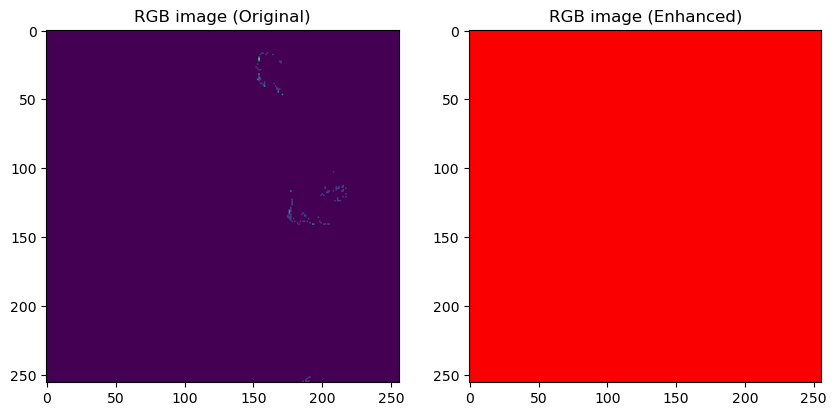

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
import rasterio as rio

# get the random image
img = np.random.randint(len(tiles))
# print(img)

# # open image with rio
src = rio.open(tiles[img])
# print(src.meta)

data = src.read()
# print(data.shape)

# # change the axis from (band, x, y) to (x,y, band)
data = np.transpose(data, (1, 2, 0))
# print(data.shape)

data_enhanced = np.zeros((256,256,6))
for i in range(data.shape[-1]):
    p2, p98 = np.percentile(data[:, :, i], (2, 98))
    data_enhanced[:, :, i] = exposure.rescale_intensity(data[:, :, i], in_range=(p2, p98))

# Plot imagery
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(10,5))
ax1.set_title("RGB image (Original)")
ax2.set_title("RGB image (Enhanced)")
ax1.imshow(data[:, :, 0:3])
ax2.imshow(data_enhanced[:, :, 0:3])
plt.show()

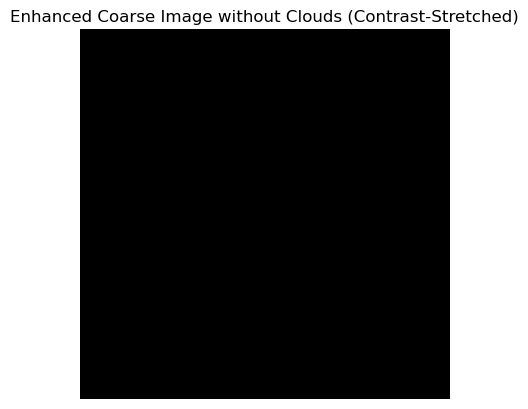

In [5]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from skimage import exposure

# Path to the enhanced image without clouds
enhanced_image_path = './enhanced_coarse_image_no_clouds_simple.tif'  # Replace with your cloud-free image path

# Load the enhanced image without clouds
with rasterio.open(enhanced_image_path) as src:
    img = src.read()  # Read all bands (assumes RGB or grayscale)
    profile = src.profile  # Get metadata for saving later

# Convert to grayscale by averaging the bands
# If the image is already a single band, this step is not necessary
if img.shape[0] > 1:
    grayscale_img = np.mean(img, axis=0)
else:
    grayscale_img = img[0]

# Apply contrast stretching
p2, p98 = np.percentile(grayscale_img, (2, 98))  # Stretch between 2nd and 98th percentile
stretched_img = exposure.rescale_intensity(grayscale_img, in_range=(p2, p98))

# Save the contrast-stretched grayscale image
output_bw_path = './enhanced_coarse_image_no_clouds_bw_contrast_stretched.tif'
# Update profile for single-band grayscale output
profile.update(dtype=rasterio.float32, count=1)
with rasterio.open(output_bw_path, 'w', **profile) as dst:
    dst.write(stretched_img.astype(rasterio.float32), 1)

# Display the enhanced grayscale image
plt.imshow(stretched_img, cmap='gray')
plt.title("Enhanced Coarse Image without Clouds (Contrast-Stretched)")
plt.axis("off")
plt.show()


In [6]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from skimage import exposure

# Specify the paths to your .jp2 files (coarse data)
band2_path = "./Untitled Folder 1/T43QBB_20240908T053649_B02.jp2"  # Replace with your actual file path
band3_path = "./Untitled Folder 1/T43QBB_20240908T053649_B03.jp2"
band4_path = "./Untitled Folder 1/T43QBB_20240908T053649_B04.jp2"

# Step 1: Read each band using rasterio
with rio.open(band2_path) as band2:
    band2_data = band2.read(1)  # Read the first band

with rio.open(band3_path) as band3:
    band3_data = band3.read(1)

with rio.open(band4_path) as band4:
    band4_data = band4.read(1)

# Step 2: Stack the bands to create an RGB image
rgb_image = np.dstack((band4_data, band3_data, band2_data))

# Step 3: Normalize the RGB image (if necessary)
rgb_image_normalized = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Step 4: Enhance the image using contrast stretching
rgb_image_enhanced = np.zeros_like(rgb_image_normalized)
for i in range(rgb_image_normalized.shape[-1]):
    p2, p98 = np.percentile(rgb_image_normalized[:, :, i], (2, 98))
    rgb_image_enhanced[:, :, i] = exposure.rescale_intensity(rgb_image_normalized[:, :, i], in_range=(p2, p98))

# Step 5: Simple cloud masking based on band thresholds
# You can adjust these thresholds based on your specific data
cloud_mask = (band2_data > 200) & (band3_data > 200)  # Example thresholds for cloud detection

# Step 6: Create a masked image by setting cloud pixels to white
masked_image = rgb_image_enhanced.copy()
masked_image[cloud_mask] = [1, 1, 1]  # Set cloud pixels to white (normalized value for 0-1 range)

# Step 7: Save the enhanced and masked image
plt.imsave('coarse_data_rgb_enhanced_masked.png', masked_image)

# Step 8: Plot the original, enhanced, and masked images side by side for comparison
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.set_title("Original Image")
ax1.imshow(rgb_image_normalized)

ax2.set_title("Enhanced Image")
ax2.imshow(rgb_image_enhanced)

ax3.set_title("Masked Image")
ax3.imshow(masked_image)

plt.show()



MemoryError: Unable to allocate 3.59 GiB for an array with shape (10980, 10980, 4) and data type float64

<Figure size 1800x600 with 3 Axes>

C:\Users\prava\anaconda3\Lib\site-packages\rasterio\__init__.py:378: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Band 2 Masked - Min: 0 Max: 0
Band 3 Masked - Min: 0 Max: 0
Band 4 Masked - Min: 0 Max: 0


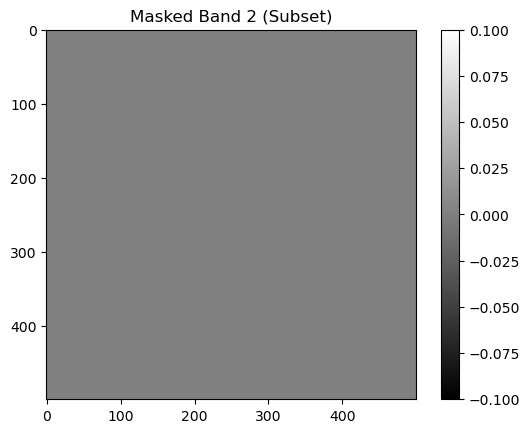

In [7]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Specify the paths to your .jp2 files (coarse data)
band2_path = "./Untitled Folder 1/T43QBB_20240908T053649_B02.jp2"
band3_path = "./Untitled Folder 1/T43QBB_20240908T053649_B03.jp2"
band4_path = "./Untitled Folder 1/T43QBB_20240908T053649_B04.jp2"

# Step 1: Read each band using rasterio
with rio.open(band2_path) as band2:
    band2_data = band2.read(1)

with rio.open(band3_path) as band3:
    band3_data = band3.read(1)

with rio.open(band4_path) as band4:
    band4_data = band4.read(1)

# Step 2: Simple cloud masking based on band thresholds
cloud_mask = (band2_data > 200) & (band3_data > 200)  # Example thresholds for cloud detection

# Step 3: Create a masked band for each band
band2_masked = np.where(cloud_mask, 0, band2_data)
band3_masked = np.where(cloud_mask, 0, band3_data)
band4_masked = np.where(cloud_mask, 0, band4_data)

# Step 4: Save the masked bands as new .tif files
with rio.open('band2_masked.tif', 'w', driver='GTiff', height=band2_masked.shape[0],
               width=band2_masked.shape[1], count=1, dtype=band2_masked.dtype) as dst:
    dst.write(band2_masked.astype(np.uint8), 1)

with rio.open('band3_masked.tif', 'w', driver='GTiff', height=band3_masked.shape[0],
               width=band3_masked.shape[1], count=1, dtype=band3_masked.dtype) as dst:
    dst.write(band3_masked.astype(np.uint8), 1)

with rio.open('band4_masked.tif', 'w', driver='GTiff', height=band4_masked.shape[0],
               width=band4_masked.shape[1], count=1, dtype=band4_masked.dtype) as dst:
    dst.write(band4_masked.astype(np.uint8), 1)

# Step 5: Check statistics instead of plotting the full image
print("Band 2 Masked - Min:", band2_masked.min(), "Max:", band2_masked.max())
print("Band 3 Masked - Min:", band3_masked.min(), "Max:", band3_masked.max())
print("Band 4 Masked - Min:", band4_masked.min(), "Max:", band4_masked.max())

# Optional: Visualize a smaller section
plt.imshow(band2_masked[0:500, 0:500], cmap='gray')  # Visualize only a smaller region
plt.title('Masked Band 2 (Subset)')
plt.colorbar()
plt.show()


In [2]:
import os

# Directory where you've uploaded your .jp2 files
data_dir = "./Untitled Folder 1"  # This assumes you created or uploaded files to a folder called 'jpfiles'

# Check if the directory and files exist
files = os.listdir(data_dir)
print("Files in directory:", files)

Files in directory: ['T43QBB_20240908T053649_B02.jp2', 'T43QBB_20240908T053649_B03.jp2', 'T43QBB_20240908T053649_B04.jp2', 'T43QBB_20240908T053649_TCI.jp2']


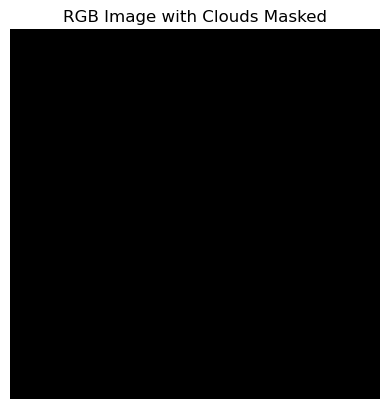

In [1]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Specify the paths to your .jp2 files (coarse data)
band2_path = "./Untitled Folder 1/T43QBB_20240908T053649_B02.jp2"
band3_path = "./Untitled Folder 1/T43QBB_20240908T053649_B03.jp2"
band4_path = "./Untitled Folder 1/T43QBB_20240908T053649_B04.jp2"

# Step 1: Read each band using rasterio
with rio.open(band2_path) as band2:
    band2_data = band2.read(1)

with rio.open(band3_path) as band3:
    band3_data = band3.read(1)

with rio.open(band4_path) as band4:
    band4_data = band4.read(1)

# Step 2: Stack the bands to create an RGB image
rgb_image = np.dstack((band4_data, band3_data, band2_data))

# Step 3: Set cloud mask based on band data
# Adjust these threshold values as per the band statistics
cloud_mask = (band2_data > 100) & (band3_data > 100)

# Step 4: Apply cloud mask to the RGB image
masked_rgb_image = np.copy(rgb_image)
masked_rgb_image[cloud_mask] = 0  # Set cloud-covered pixels to black (0)

# Step 5: Display the masked RGB image
plt.imshow(masked_rgb_image)
plt.title("RGB Image with Clouds Masked")
plt.axis('off')
plt.show()


In [4]:
import tifffile as tiff
import numpy as np

def get_RGB(ID):

    # Load Blue (B2), Green (B3) and Red (B4) bands
    B2 = tiff.imread('./Untitled Folder 1/T43QBB_20240908T053649_B02.tif'.format(ID, ID))
    B3 = tiff.imread('./Untitled Folder 1/T43QBB_20240908T053649_B03.tif'.format(ID, ID))
    B4 = tiff.imread('./Untitled Folder 1/T43QBB_20240908T053649_B04.tif'.format(ID, ID))

    # Stack and scale bands
    RGB = np.dstack((B4, B3, B2))
    RGB = np.clip(RGB*0.0000275-0.2, 0, 1)

    # Clip to enhance contrast
    RGB = np.clip(RGB,0,0.3)/0.3

    return RGB

In [12]:
import matplotlib.pyplot as plt

ID = './Untitled Folder 1/T43QBB_20240908T053649_TCI.tif'
RGB = get_RGB(ID)

# Plot the RGB image
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(RGB)

TiffFileError: not a TIFF file b'\x00\x00\x00\x0c'

In [6]:
import rasterio

# Load Blue (B2), Green (B3), and Red (B4) bands using rasterio
B2_path = './Untitled Folder 1/T43QBB_20240908T053649_B02.jp2'
B3_path = './Untitled Folder 1/T43QBB_20240908T053649_B03.jp2'
B4_path = './Untitled Folder 1/T43QBB_20240908T053649_B04.jp2'

# Open each band using rasterio and read the data
with rasterio.open(B2_path) as B2_src:
    B2 = B2_src.read(1)  # Read the first (and only) band

with rasterio.open(B3_path) as B3_src:
    B3 = B3_src.read(1)

with rasterio.open(B4_path) as B4_src:
    B4 = B4_src.read(1)

# Now you can use B2, B3, and B4 as arrays for further processing
print("Loaded bands successfully.")


Loaded bands successfully.


In [7]:
import rasterio

# Load Blue (B2), Green (B3), and Red (B4) bands using rasterio
ID = './Untitled Folder 1/T43QBB_20240908T053649_TCI.jp2'

# Open each band using rasterio and read the data
with rasterio.open(ID) as B2_src:
    B2 = B2_src.read(1)  # Read the first (and only) band



# Now you can use B2, B3, and B4 as arrays for further processing
print("Loaded bands successfully.")


Loaded bands successfully.


In [8]:
import rasterio
from rasterio import shutil as rio_shutil

# Paths to your .jp2 files and desired .tif output paths
jp2_paths = [
    './Untitled Folder 1/T43QBB_20240908T053649_B02.jp2',
    './Untitled Folder 1/T43QBB_20240908T053649_B03.jp2',
    './Untitled Folder 1/T43QBB_20240908T053649_B04.jp2'
]
tif_paths = [
    './Untitled Folder 1/T43QBB_20240908T053649_B02.tif',
    './Untitled Folder 1/T43QBB_20240908T053649_B03.tif',
    './Untitled Folder 1/T43QBB_20240908T053649_B04.tif'
]

# Convert each .jp2 file to .tif
for jp2, tif in zip(jp2_paths, tif_paths):
    with rasterio.open(jp2) as src:
        rio_shutil.copy(src, tif, driver='GTiff')

print("Conversion completed.")



Conversion completed.


In [9]:
import rasterio
from rasterio import shutil as rio_shutil

# Path to the additional .jp2 file and the output .tif file
id_jp2_path = './Untitled Folder 1/T43QBB_20240908T053649_TCI.jp2'
id_tif_path = './Untitled Folder 1/T43QBB_20240908T053649_TCI.tif'

# Convert the .jp2 file to .tif
with rasterio.open(id_jp2_path) as src:
    rio_shutil.copy(src, id_tif_path, driver='GTiff')

print("Conversion of ID file completed. Saved as:", id_tif_path)


Conversion of ID file completed. Saved as: ./Untitled Folder 1/T43QBB_20240908T053649_TCI.tif


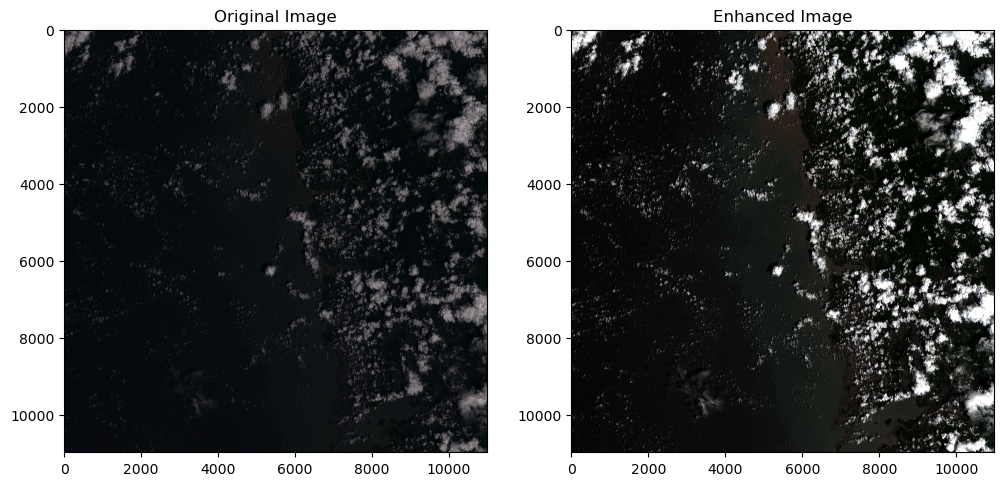

In [1]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from skimage import exposure

# Specify the paths to your .jp2 files (coarse data)
band2_path = "./Untitled Folder 1/T43QBB_20240908T053649_B02.jp2"  # Blue band
band3_path = "./Untitled Folder 1/T43QBB_20240908T053649_B03.jp2"  # Green band
band4_path = "./Untitled Folder 1/T43QBB_20240908T053649_B04.jp2"  # Red band

# Step 1: Read each band using rasterio
with rio.open(band2_path) as band2:
    band2_data = band2.read(1)

with rio.open(band3_path) as band3:
    band3_data = band3.read(1)

with rio.open(band4_path) as band4:
    band4_data = band4.read(1)

# Step 2: Stack the bands to create an RGB image
rgb_image = np.dstack((band4_data, band3_data, band2_data))

# Step 3: Normalize the RGB image
rgb_image_normalized = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Step 4: Enhance the image using contrast stretching
rgb_image_enhanced = np.zeros_like(rgb_image_normalized)
for i in range(rgb_image_normalized.shape[-1]):
    p2, p98 = np.percentile(rgb_image_normalized[:, :, i], (2, 98))
    rgb_image_enhanced[:, :, i] = exposure.rescale_intensity(rgb_image_normalized[:, :, i], in_range=(p2, p98))

# Step 5: Save the enhanced image as a .tif file with RGB bands
output_tif_path = 'coarse_data_rgb_enhanced.tif'
with rio.open(
    output_tif_path,
    'w',
    driver='GTiff',
    width=band2.width,
    height=band2.height,
    count=3,
    dtype=rgb_image_enhanced.dtype,
    crs=band2.crs,
    transform=band2.transform,
) as dst:
    dst.write((rgb_image_enhanced[:, :, 0] * 255).astype('uint8'), 1)  # Red
    dst.write((rgb_image_enhanced[:, :, 1] * 255).astype('uint8'), 2)  # Green
    dst.write((rgb_image_enhanced[:, :, 2] * 255).astype('uint8'), 3)  # Blue

# Step 6: Save individual color bands as separate .tif files
with rio.open('coarse_data_red.tif', 'w', driver='GTiff', width=band4.width, height=band4.height, count=1,
              dtype=band4_data.dtype, crs=band4.crs, transform=band4.transform) as dst_red:
    dst_red.write(band4_data, 1)  # Red band

with rio.open('coarse_data_green.tif', 'w', driver='GTiff', width=band3.width, height=band3.height, count=1,
              dtype=band3_data.dtype, crs=band3.crs, transform=band3.transform) as dst_green:
    dst_green.write(band3_data, 1)  # Green band

with rio.open('coarse_data_blue.tif', 'w', driver='GTiff', width=band2.width, height=band2.height, count=1,
              dtype=band2_data.dtype, crs=band2.crs, transform=band2.transform) as dst_blue:
    dst_blue.write(band2_data, 1)  # Blue band

# Step 7: Plot the original and enhanced images side by side for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title("Original Image")
ax1.imshow(rgb_image_normalized)

ax2.set_title("Enhanced Image")
ax2.imshow(rgb_image_enhanced)

plt.show()


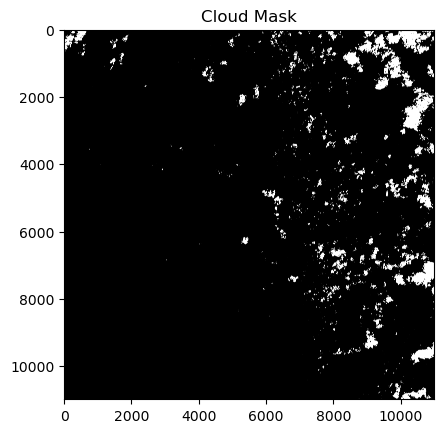

In [2]:
import numpy as np
import rasterio as rio
import cv2
import matplotlib.pyplot as plt

# Specify the path to your enhanced .tif image
tif_path = 'coarse_data_rgb_enhanced.tif'

# Load the enhanced .tif image
with rio.open(tif_path) as src:
    rgb_data = src.read([1, 2, 3])  # Assuming R, G, B bands are in this order
    profile = src.profile

# Convert to a single 2D grayscale representation (using the red channel for simplicity)
gray_image = rgb_data[0]  # Or use another approach to create a grayscale

# Apply a simple threshold to identify cloud-like regions
_, cloud_mask = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Optional: Save the mask as a new .tif file
mask_path = 'cloud_mask.tif'
with rio.open(
    mask_path,
    'w',
    driver='GTiff',
    height=cloud_mask.shape[0],
    width=cloud_mask.shape[1],
    count=1,
    dtype=np.uint8,
    crs=profile['crs'],
    transform=profile['transform'],
) as dst:
    dst.write(cloud_mask, 1)

# Display the mask
plt.imshow(cloud_mask, cmap='gray')
plt.title("Cloud Mask")
plt.show()


In [4]:
plt.savefig(f"Unet_KFold/Results/Accuracy/


SyntaxError: unterminated string literal (detected at line 1) (1175084677.py, line 1)

In [5]:
pip install tensorflow==2.4.1 keras==2.4.3 efficientnet==1.0.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [11]:
import rasterio
import numpy as np

# Paths to your .tif files
coarse_image_path = './coarse_data_rgb_enhanced.tif'  # Enhanced .tif file path
cloud_mask_path = './cloud_mask.tif'  # Cloud mask file path

# Load the cloud mask
with rasterio.open(cloud_mask_path) as mask_src:
    cloud_mask = mask_src.read(1)  # Read the first band for the mask

# Load the coarse enhanced image
with rasterio.open(coarse_image_path) as image_src:
    coarse_image = image_src.read()  # Read all bands

# Create a mask for non-cloud pixels
non_cloud_mask = (cloud_mask == 0)  # Assuming 0 for clear, 1 for cloudy

# Apply the mask to create the masked image
masked_image = np.zeros_like(coarse_image)
for i in range(coarse_image.shape[0]):  # Loop over each band
    masked_image[i] = coarse_image[i] * non_cloud_mask  # Mask clouds

# Save the masked image without clouds
output_path_masked = 'masked_coarse_image.tif'  # Path for the masked output image
with rasterio.open(output_path_masked, 'w', driver='GTiff',
                   height=masked_image.shape[1],
                   width=masked_image.shape[2],
                   count=masked_image.shape[0],
                   dtype=masked_image.dtype) as dest:
    dest.write(masked_image)

# Create an image highlighting the clouds
highlighted_image = coarse_image.copy()  # Copy the original image
highlighted_image[:, cloud_mask == 1] = [255, 0, 0]  # Color clouds red (R, G, B)

# Save the highlighted image with clouds in red
output_path_highlighted = 'highlighted_clouds_image.tif'  # Path for the highlighted output image
with rasterio.open(output_path_highlighted, 'w', driver='GTiff',
                   height=highlighted_image.shape[1],
                   width=highlighted_image.shape[2],
                   count=highlighted_image.shape[0],
                   dtype=highlighted_image.dtype) as dest:
    dest.write(highlighted_image)

print("Cloud masking and highlighting complete!")
print("Masked image saved at:", output_path_masked)
print("Highlighted clouds image saved at:", output_path_highlighted)


ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (3,0)

In [13]:
import rasterio
import numpy as np

# Paths to your .tif files
coarse_image_path = './coarse_data_rgb_enhanced.tif'  # Enhanced .tif file path
cloud_mask_path = './cloud_mask.tif'  # Cloud mask file path

# Load the cloud mask
with rasterio.open(cloud_mask_path) as mask_src:
    cloud_mask = mask_src.read(1)  # Read the first band for the mask

# Load the coarse enhanced image
with rasterio.open(coarse_image_path) as image_src:
    coarse_image = image_src.read()  # Read all bands

# Create a mask for non-cloud pixels
non_cloud_mask = (cloud_mask == 0)  # Assuming 0 for clear, 1 for cloudy

# Apply the mask to create the masked image
masked_image = np.zeros_like(coarse_image)
for i in range(coarse_image.shape[0]):  # Loop over each band
    masked_image[i] = coarse_image[i] * non_cloud_mask  # Mask clouds

# Save the masked image without clouds
output_path_masked = 'masked_coarse_image.tif'  # Path for the masked output image
with rasterio.open(output_path_masked, 'w', driver='GTiff',
                   height=masked_image.shape[1],
                   width=masked_image.shape[2],
                   count=masked_image.shape[0],
                   dtype=masked_image.dtype) as dest:
    dest.write(masked_image)

# Create an image highlighting the clouds
highlighted_image = coarse_image.copy()  # Copy the original image

# Highlight clouds in red
highlighted_image[0][cloud_mask == 1] = 255  # Set the R channel to 255 (Red) for clouds
highlighted_image[1][cloud_mask == 1] = 0    # Set the G channel to 0 (Green) for clouds
highlighted_image[2][cloud_mask == 1] = 0    # Set the B channel to 0 (Blue) for clouds

# Save the highlighted image with clouds in red
output_path_highlighted = 'highlighted_clouds_image.tif'  # Path for the highlighted output image
with rasterio.open(output_path_highlighted, 'w', driver='GTiff',
                   height=highlighted_image.shape[1],
                   width=highlighted_image.shape[2],
                   count=highlighted_image.shape[0],
                   dtype=highlighted_image.dtype) as dest:
    dest.write(highlighted_image)

print("Cloud masking and highlighting complete!")
print("Masked image saved at:", output_path_masked)
print("Highlighted clouds image saved at:", output_path_highlighted)


Cloud masking and highlighting complete!
Masked image saved at: masked_coarse_image.tif
Highlighted clouds image saved at: highlighted_clouds_image.tif


In [14]:
import rasterio
import numpy as np

# Paths to your .tif files
coarse_image_path = './coarse_data_rgb_enhanced.tif'  # Enhanced .tif file path
cloud_mask_path = './cloud_mask.tif'  # Cloud mask file path

# Load the cloud mask
with rasterio.open(cloud_mask_path) as mask_src:
    cloud_mask = mask_src.read(1)  # Read the first band for the mask

# Load the coarse enhanced image
with rasterio.open(coarse_image_path) as image_src:
    coarse_image = image_src.read()  # Read all bands

# Create a mask for non-cloud pixels (assuming 255 for white clouds)
non_cloud_mask = (cloud_mask == 0)  # 0 is black (no clouds)

# Apply the mask to create the masked image
masked_image = np.zeros_like(coarse_image)
for i in range(coarse_image.shape[0]):  # Loop over each band
    masked_image[i] = coarse_image[i] * non_cloud_mask  # Mask clouds

# Save the masked image without clouds
output_path_masked = 'masked_coarse_image.tif'  # Path for the masked output image
with rasterio.open(output_path_masked, 'w', driver='GTiff',
                   height=masked_image.shape[1],
                   width=masked_image.shape[2],
                   count=masked_image.shape[0],
                   dtype=masked_image.dtype) as dest:
    dest.write(masked_image)

# Create an image highlighting the clouds
highlighted_image = coarse_image.copy()  # Copy the original image

# Highlight clouds in red
highlighted_image[0][cloud_mask == 255] = 255  # Set the R channel to 255 (Red) for clouds
highlighted_image[1][cloud_mask == 255] = 0    # Set the G channel to 0 (Green) for clouds
highlighted_image[2][cloud_mask == 255] = 0    # Set the B channel to 0 (Blue) for clouds

# Save the highlighted image with clouds in red
output_path_highlighted = 'highlighted_clouds_image.tif'  # Path for the highlighted output image
with rasterio.open(output_path_highlighted, 'w', driver='GTiff',
                   height=highlighted_image.shape[1],
                   width=highlighted_image.shape[2],
                   count=highlighted_image.shape[0],
                   dtype=highlighted_image.dtype) as dest:
    dest.write(highlighted_image)

print("Cloud masking and highlighting complete!")
print("Masked image saved at:", output_path_masked)
print("Highlighted clouds image saved at:", output_path_highlighted)


Cloud masking and highlighting complete!
Masked image saved at: masked_coarse_image.tif
Highlighted clouds image saved at: highlighted_clouds_image.tif


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


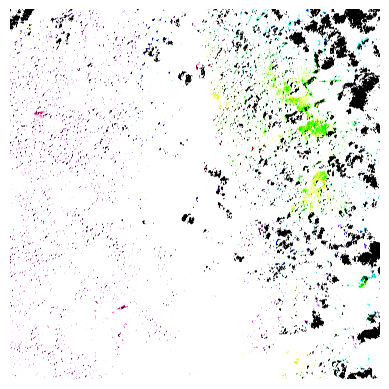

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


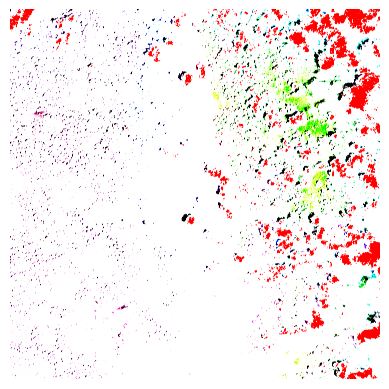

In [15]:
import rasterio
import matplotlib.pyplot as plt

# Function to display a .tif image
def display_image(image_path):
    with rasterio.open(image_path) as src:
        img = src.read()  # Read the image data
        # If the image has more than 3 bands, we'll show the first 3
        if img.shape[0] > 3:
            img = img[:3]  # Select the first three bands (R, G, B)
        img = img.transpose((1, 2, 0))  # Change shape to (height, width, channels)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()

# Display the masked and highlighted images
display_image('./masked_coarse_image.tif')
display_image('./highlighted_clouds_image.tif')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


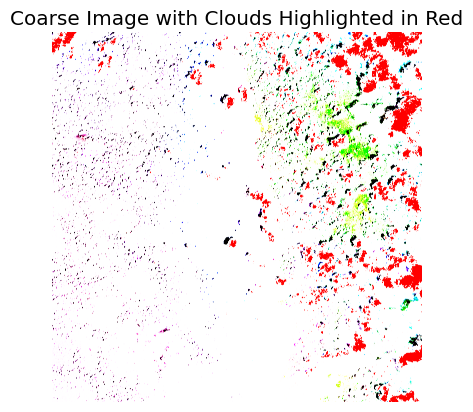

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


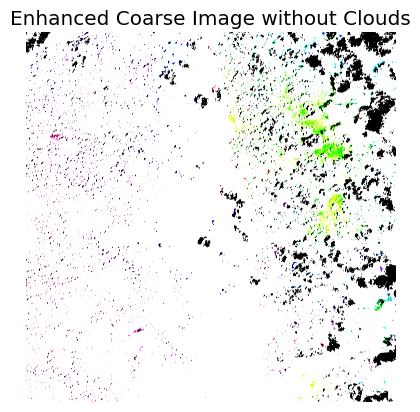

In [21]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Paths to the coarse image and cloud mask files
coarse_image_path = './coarse_data_rgb_enhanced.tif'  # Replace with your coarse image path
cloud_mask_path = './cloud_mask.tif'  # Replace with your cloud mask path

# Step 1: Load the coarse image and the cloud mask
with rasterio.open(coarse_image_path) as src:
    coarse_img = src.read()  # Read the coarse image bands
    profile = src.profile  # Store the metadata for saving later

with rasterio.open(cloud_mask_path) as mask_src:
    cloud_mask = mask_src.read(1)  # Read the first band as the cloud mask (assuming single-band mask)

# Step 2: Highlight the Clouds in a Different Color (e.g., red)
highlighted_img = np.copy(coarse_img)
# Apply the mask for each channel individually to avoid shape mismatch
highlighted_img[0][cloud_mask > 0] = 255  # Red channel
highlighted_img[1][cloud_mask > 0] = 0    # Green channel
highlighted_img[2][cloud_mask > 0] = 0    # Blue channel

# Display the highlighted image with clouds colored
plt.imshow(highlighted_img.transpose(1, 2, 0))
plt.title("Coarse Image with Clouds Highlighted in Red")
plt.axis("off")
plt.show()

# Step 3: Remove the Clouds from the Coarse Image
# Create a masked image where cloud areas are set to black
enhanced_img_no_clouds = np.copy(coarse_img)
enhanced_img_no_clouds[:, cloud_mask > 0] = 0  # Set cloud pixels to black in all channels

# Save the enhanced image without clouds
output_path = './enhanced_coarse_image_no_clouds.tif'
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(enhanced_img_no_clouds)

# Display the final enhanced image without clouds
plt.imshow(enhanced_img_no_clouds.transpose(1, 2, 0))
plt.title("Enhanced Coarse Image without Clouds")
plt.axis("off")
plt.show()


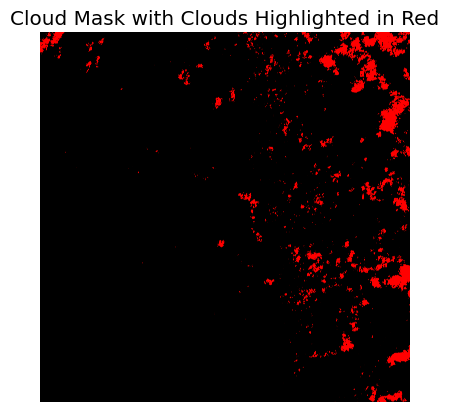

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio

# Load the cloud mask image
cloud_mask_path = '/mnt/data/image.png'  # Update this path if necessary
cloud_mask = plt.imread('./cloud_mask.tif')

# Set the color for clouds and background
highlighted_mask = np.zeros((cloud_mask.shape[0], cloud_mask.shape[1], 3))
highlighted_mask[cloud_mask > 0] = [1, 0, 0]  # Set cloud areas to red

# Plot the highlighted cloud mask
plt.imshow(highlighted_mask)
plt.title("Cloud Mask with Clouds Highlighted in Red")
plt.axis("off")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


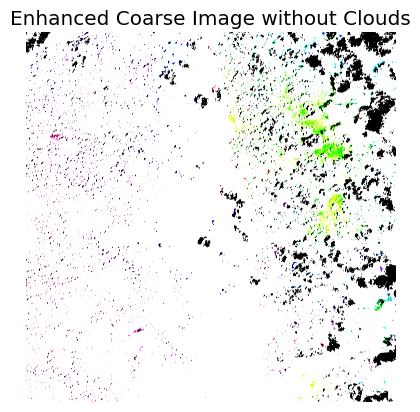

In [22]:
# Step 3: Remove the Clouds from the Coarse Image
# Create a masked image where cloud areas are set to black
enhanced_img_no_clouds = np.copy(coarse_img)
enhanced_img_no_clouds[:, cloud_mask > 0] = 0  # Set cloud pixels to black in all channels

# Save the enhanced image without clouds
output_path = './enhanced_coarse_image_no_clouds.tif'
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(enhanced_img_no_clouds)

# Display the final enhanced image without clouds
plt.imshow(enhanced_img_no_clouds.transpose(1, 2, 0))
plt.title("Enhanced Coarse Image without Clouds")
plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


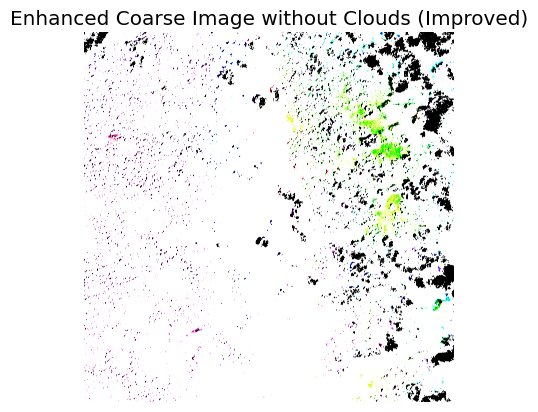

In [23]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Paths to the coarse image and cloud mask files
coarse_image_path = './coarse_data_rgb_enhanced.tif'  # Replace with your coarse image path
cloud_mask_path = './cloud_mask.tif'  # Replace with your cloud mask path

# Step 1: Load the coarse image and the cloud mask
with rasterio.open(coarse_image_path) as src:
    coarse_img = src.read()  # Read the coarse image bands
    profile = src.profile  # Store the metadata for saving later

with rasterio.open(cloud_mask_path) as mask_src:
    cloud_mask = mask_src.read(1)  # Read the first band as the cloud mask (assuming single-band mask)

# Ensure cloud mask is binary
cloud_mask_binary = (cloud_mask > 0).astype(np.uint8)

# Step 2: Apply the Cloud Mask to Remove Clouds
# Set cloud areas in the original image to black across all bands
enhanced_img_no_clouds = np.copy(coarse_img)
for i in range(enhanced_img_no_clouds.shape[0]):  # Loop through each band
    enhanced_img_no_clouds[i] = np.where(cloud_mask_binary == 1, 0, enhanced_img_no_clouds[i])

# Save the enhanced image without clouds
output_path = './enhanced_coarse_image_no_clouds_fixed.tif'
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(enhanced_img_no_clouds)

# Display the final enhanced image without clouds
plt.imshow(enhanced_img_no_clouds.transpose(1, 2, 0))
plt.title("Enhanced Coarse Image without Clouds (Improved)")
plt.axis("off")
plt.show()


In [24]:
pip install s2cloudless


  Obtaining dependency information for s2cloudless from https://files.pythonhosted.org/packages/a5/ed/1971cd2cd4d1e08940a209308bc1a142618cb7dc84586af7fad69c0db4d9/s2cloudless-1.7.3-py3-none-any.whl.metadata
  Obtaining dependency information for lightgbm>=2.0.11 from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/26/d0/22f68eb23eea053a31655960f133c0be9726c6a881547e6e9e7e2a946c4f/opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for sentinelhub>=3.9.0 from https://files.pythonhosted.org/packages/91/0c/c092d9f8ecfff2cf5fd003adc487eb4bd7244cc15146d5b925be9d8c52e4/sentinelhub-3.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for aenum>=2.1.4 from https://files.pythonhosted.org/packages/d0/fa/ca0c66b388624ba9dbbf

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


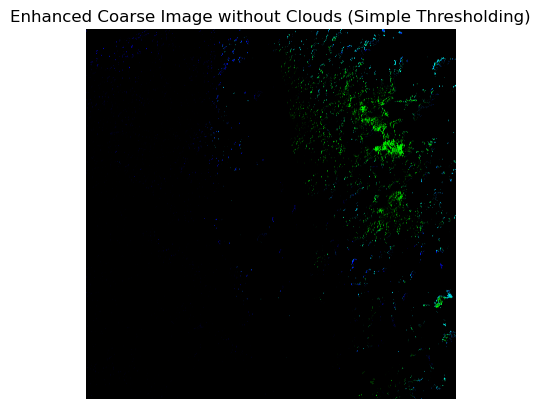

In [3]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Paths to the coarse image file
coarse_image_path = './coarse_data_rgb_enhanced.tif'  # Replace with your coarse image path

# Load the coarse image data
with rasterio.open(coarse_image_path) as src:
    coarse_img = src.read([1, 2, 3])  # Read RGB bands only (assuming bands 2, 3, 4 correspond to RGB)
    profile = src.profile  # Store the metadata for saving later

# Scale image if in uint16 format (Sentinel-2 reflectance)
if coarse_img.dtype == 'uint16':
    coarse_img = coarse_img / 10000.0

# Simple thresholding for cloud detection
# Clouds often appear bright across bands, especially in the blue band
blue_band = coarse_img[0]  # B02
brightness = coarse_img.mean(axis=0)  # Average reflectance across R, G, B

# Create a cloud mask based on brightness and blue band reflectance
cloud_mask_binary = (blue_band > 0.3) & (brightness > 0.3)  # Adjust threshold if needed

# Apply the cloud mask to remove clouds
enhanced_img_no_clouds = np.copy(coarse_img)
for i in range(enhanced_img_no_clouds.shape[0]):
    enhanced_img_no_clouds[i][cloud_mask_binary] = 0  # Set cloud pixels to black

# Save the enhanced image without clouds
output_path = './enhanced_coarse_image_no_clouds_simple.tif'
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write((enhanced_img_no_clouds * 10000).astype(rasterio.uint16))  # Scale back if required

# Display the final enhanced image without clouds
plt.imshow(enhanced_img_no_clouds.transpose(1, 2, 0))
plt.title("Enhanced Coarse Image without Clouds (Simple Thresholding)")
plt.axis("off")
plt.show()





In [12]:
import rasterio
import numpy as np

# Paths to your .tif files
coarse_image_path = './coarse_data_rgb_enhanced.tif'  # Enhanced .tif file path
cloud_mask_path = './cloud_mask.tif'  # Cloud mask file path

# Load the cloud mask
with rasterio.open(cloud_mask_path) as mask_src:
    cloud_mask = mask_src.read(1)  # Read the first band for the mask

# Load the coarse enhanced image
with rasterio.open(coarse_image_path) as image_src:
    coarse_image = image_src.read()  # Read all bands

# Create a mask for non-cloud pixels
non_cloud_mask = (cloud_mask == 0)  # Assuming 0 for clear, 1 for cloudy

# Apply the mask to create the masked image
masked_image = np.zeros_like(coarse_image)
for i in range(coarse_image.shape[0]):  # Loop over each band
    masked_image[i] = coarse_image[i] * non_cloud_mask  # Mask clouds

# Save the masked image without clouds
output_path_masked = 'masked_coarse_image.tif'  # Path for the masked output image
with rasterio.open(output_path_masked, 'w', driver='GTiff',
                   height=masked_image.shape[1],
                   width=masked_image.shape[2],
                   count=masked_image.shape[0],
                   dtype=masked_image.dtype) as dest:
    dest.write(masked_image)

# Create an image highlighting the clouds
highlighted_image = coarse_image.copy()  # Copy the original image

# Highlight clouds in red
for i in range(coarse_image.shape[0]):  # Loop through each band
    highlighted_image[i][cloud_mask == 1] = 0  # Set cloud pixels to black
highlighted_image[0][cloud_mask == 1] = 255  # Set the R channel to 255 (Red) for clouds
highlighted_image[1][cloud_mask == 1] = 0    # Set the G channel to 0 (Green) for clouds
highlighted_image[2][cloud_mask == 1] = 0    # Set the B channel to 0 (Blue) for clouds

# Save the highlighted image with clouds in red
output_path_highlighted = 'highlighted_clouds_image.tif'  # Path for the highlighted output image
with rasterio.open(output_path_highlighted, 'w', driver='GTiff',
                   height=highlighted_image.shape[1],
                   width=highlighted_image.shape[2],
                   count=highlighted_image.shape[0],
                   dtype=highlighted_image.dtype) as dest:
    dest.write(highlighted_image)

print("Cloud masking and highlighting complete!")
print("Masked image saved at:", output_path_masked)
print("Highlighted clouds image saved at:", output_path_highlighted)


Cloud masking and highlighting complete!
Masked image saved at: masked_coarse_image.tif
Highlighted clouds image saved at: highlighted_clouds_image.tif


In [ ]:
pip install segmentation-model == 1.0.1

In [ ]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [6]:
!pip install segmentation-models


  Obtaining dependency information for segmentation-models from https://files.pythonhosted.org/packages/da/b9/4a183518c21689a56b834eaaa45cad242d9ec09a4360b5b10139f23c63f4/segmentation_models-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for keras-applications<=1.0.8,>=1.0.7 from https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for image-classifiers==1.0.0 from https://files.pythonhosted.org/packages/81/98/6f84720e299a4942ab80df5f76ab97b7828b24d1de5e9b2cbbe6073228b7/image_classifiers-1.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for efficientnet==1.0.0 from https://files.pythonhosted.org/packages/97/82/f3ae07316f0461417dc54affab6e86ab188a5a22f33176d35271628b96e0/efficientnet-1.0.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/50.7 kB ? eta -:--:--
   --------------------------

In [8]:
# First, set the SM_FRAMEWORK to use TensorFlow's Keras
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

# Then, install the compatible versions
!pip install segmentation-models==1.0.1
!pip install efficientnet==1.1.0


  Obtaining dependency information for efficientnet==1.1.0 from https://files.pythonhosted.org/packages/28/91/67848a143b54c331605bfba5fd31cf4e9db13d2e429d103fe807acc3bcf4/efficientnet-1.1.0-py3-none-any.whl.metadata
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.0.0
    Uninstalling efficientnet-1.0.0:
      Successfully uninstalled efficientnet-1.0.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models 1.0.1 requires efficientnet==1.0.0, but you have efficientnet 1.1.0 which is incompatible.


In [10]:
!pip uninstall segmentation-models efficientnet -y


Found existing installation: segmentation-models 1.0.1
Uninstalling segmentation-models-1.0.1:
  Successfully uninstalled segmentation-models-1.0.1
Found existing installation: efficientnet 1.1.0
Uninstalling efficientnet-1.1.0:
  Successfully uninstalled efficientnet-1.1.0


In [11]:
!pip install segmentation-models==1.0.1 efficientnet==1.1.0



  Obtaining dependency information for segmentation-models==1.0.1 from https://files.pythonhosted.org/packages/da/b9/4a183518c21689a56b834eaaa45cad242d9ec09a4360b5b10139f23c63f4/segmentation_models-1.0.1-py3-none-any.whl.metadata
  Using cached segmentation_models-1.0.1-py3-none-any.whl.metadata (938 bytes)
  Obtaining dependency information for efficientnet==1.1.0 from https://files.pythonhosted.org/packages/28/91/67848a143b54c331605bfba5fd31cf4e9db13d2e429d103fe807acc3bcf4/efficientnet-1.1.0-py3-none-any.whl.metadata
  Using cached efficientnet-1.1.0-py3-none-any.whl.metadata (6.2 kB)
INFO: pip is looking at multiple versions of segmentation-models to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    The user requested efficientnet==1.1.0
    segmentation-models 1.0.1 depends on efficientnet==1.0.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to 

ERROR: Cannot install efficientnet==1.1.0 and segmentation-models==1.0.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [14]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"


In [15]:
pip install segmentation-models==1.0.1 efficientnet==1.0.0


  Obtaining dependency information for segmentation-models==1.0.1 from https://files.pythonhosted.org/packages/da/b9/4a183518c21689a56b834eaaa45cad242d9ec09a4360b5b10139f23c63f4/segmentation_models-1.0.1-py3-none-any.whl.metadata
  Using cached segmentation_models-1.0.1-py3-none-any.whl.metadata (938 bytes)
  Obtaining dependency information for efficientnet==1.0.0 from https://files.pythonhosted.org/packages/97/82/f3ae07316f0461417dc54affab6e86ab188a5a22f33176d35271628b96e0/efficientnet-1.0.0-py3-none-any.whl.metadata
  Using cached efficientnet-1.0.0-py3-none-any.whl.metadata (6.1 kB)
Using cached segmentation_models-1.0.1-py3-none-any.whl (33 kB)
Using cached efficientnet-1.0.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install segmentation-models-tf


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement segmentation-models-tf (from versions: none)
ERROR: No matching distribution found for segmentation-models-tf


In [19]:


import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [3]:
pip install -U -q segmentation-models


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -q tensorflow==2.2.1

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.2.1


In [6]:
!pip install -q keras==2.5

ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.10.0rc0, 2.10.0rc1, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0rc3, 2.11.0, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.1rc0, 2.13.1rc1, 2.13.1, 2.14.0rc0, 2.14.0, 2.15.0rc0, 2.15.0rc1, 2.15.0, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.0.4, 3.0.5, 3.1.0, 3.1.1, 3.2.0, 3.2.1, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.4.0, 3.4.1, 3.5.0, 3.6.0)
ERROR: No matching distribution found for keras==2.5


In [ ]:
import rasterio
import numpy as np

def create_cloud_mask(input_tif, output_mask_tif, cloud_threshold=200):
    # Open the enhanced image file
    with rasterio.open(input_tif) as src:
        # Read the bands
        bands = src.read()
        
        # Assuming the first band is sufficient for cloud detection, you can choose other bands based on your needs
        band1 = bands[0]  # Change the index as per your requirement

        # Create a cloud mask: True for cloud pixels, False for non-cloud pixels
        cloud_mask = band1 > cloud_threshold

        # Convert boolean mask to uint8 (0 for non-cloud, 255 for cloud)
        cloud_mask_uint8 = cloud_mask.astype(np.uint8) * 255

        # Define metadata for the new mask file
        metadata = src.meta.copy()
        metadata.update({
            'count': 1,  # We will save only one band
            'dtype': 'uint8'
        })

        # Save the cloud mask as a new .tif file
        with rasterio.open(output_mask_tif, 'w', **metadata) as dst:
            dst.write(cloud_mask_uint8, 1)

# Specify your input and output file paths
input_tif = 'path/to/your/enhanced_image.tif'  # Replace with your enhanced image file path
output_mask_tif = 'path/to/save/cloud_mask.tif'  # Replace with your desired output file path

# Call the function to create cloud mask
create_cloud_mask(input_tif, output_mask_tif)


In [6]:
import rasterio as rio

In [7]:
!pip install segmentation-models

In [8]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [ ]:
# Uninstall existing versions if any
!pip install tensorflow

#Verify the installation by printing the version
import tensorflow as tf
print